# **Prodigy Infotech**

## Author : Abdelkareem Ahmed

### task:02

In [3]:
from google.colab import files


uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [5]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [21]:
print("Columns in the dataset:", df.columns)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if 'Cabin' in df.columns: #drop the cabin column cause most of it's data is not filled
    df.drop(columns=['Cabin'], inplace=True)

Columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize'],
      dtype='object')


In [7]:
df.drop_duplicates(inplace=True) #to handle duplicates

#Convert data types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# create a new feature (family size) adding SibSp and parch in this feature )
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

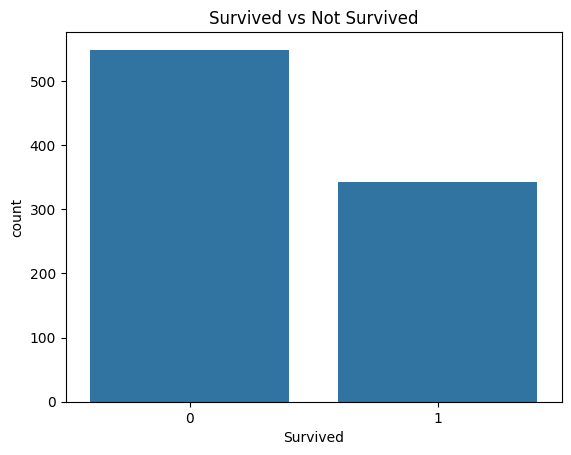

In [8]:
#relation between survived and not survived
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()

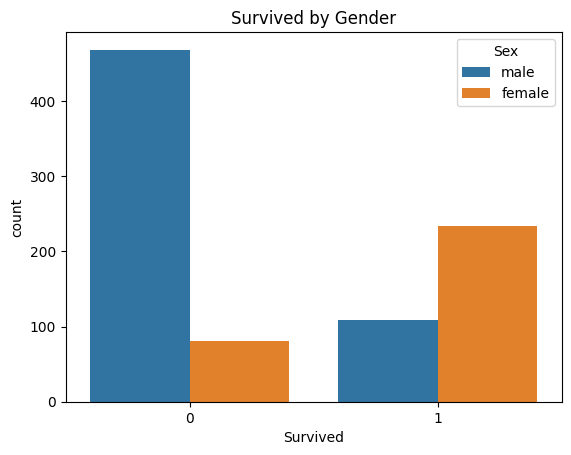

In [9]:
#the relation between survival and sexes
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survived by Gender')
plt.show()

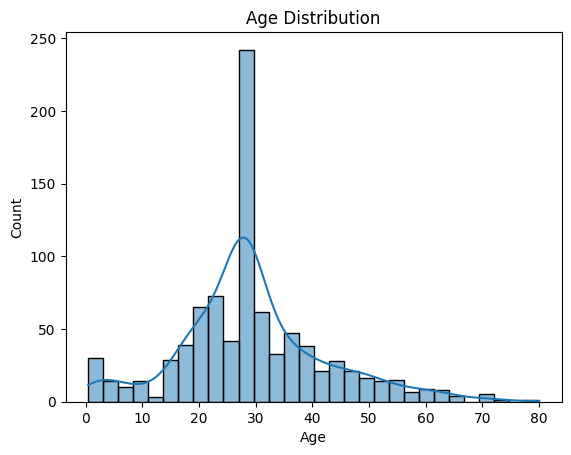

In [10]:
#age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

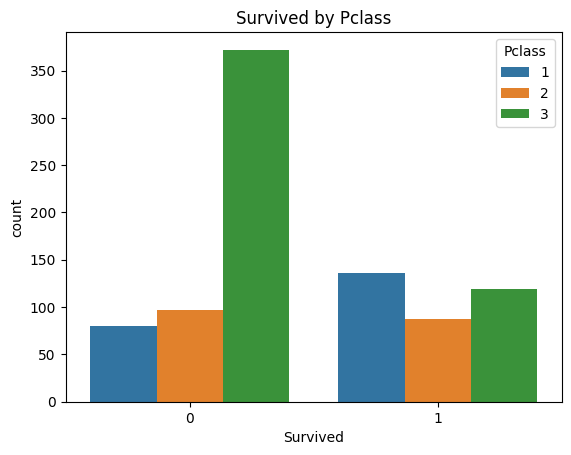

In [12]:
#Survived by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survived by Pclass')
plt.show()

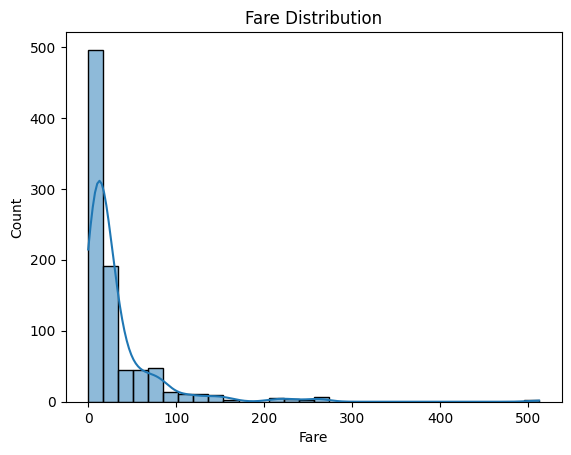

In [13]:
#Fare Distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

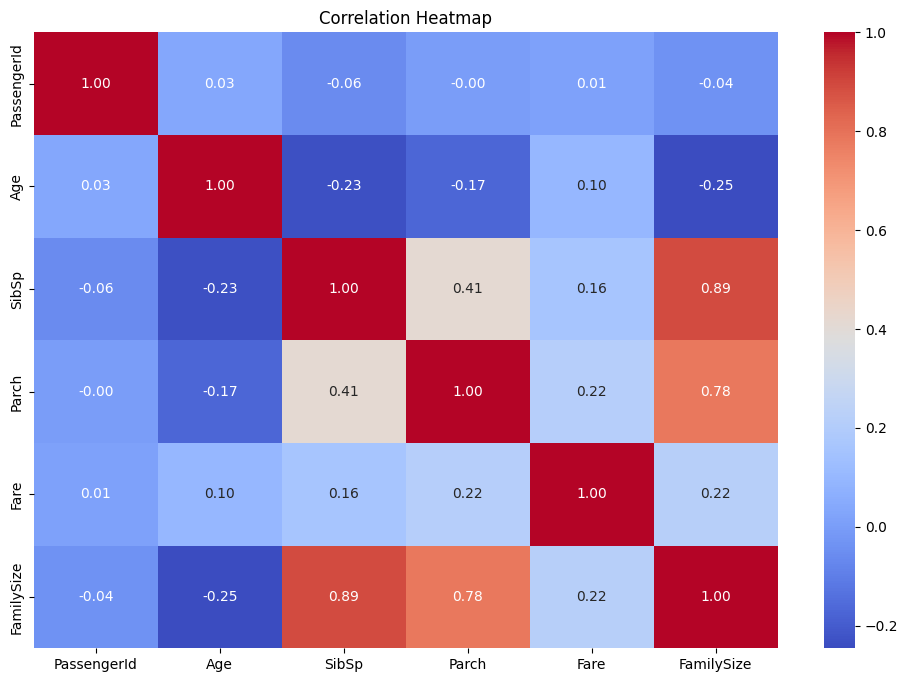

In [14]:
#Correlation Heatmap
#Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

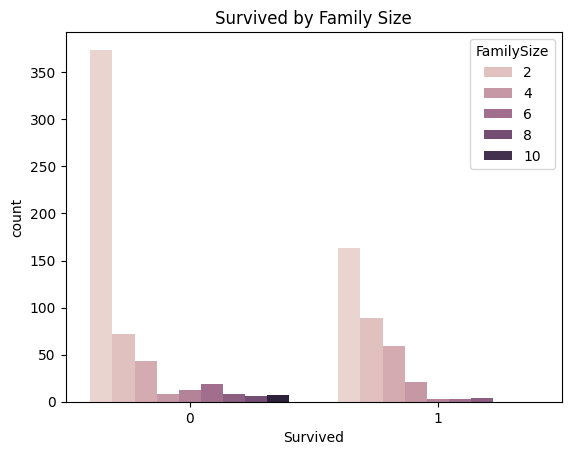

In [18]:
#who Survived by FamilySize
sns.countplot(x='Survived', hue='FamilySize', data=df)
plt.title('Survived by Family Size')
plt.show()

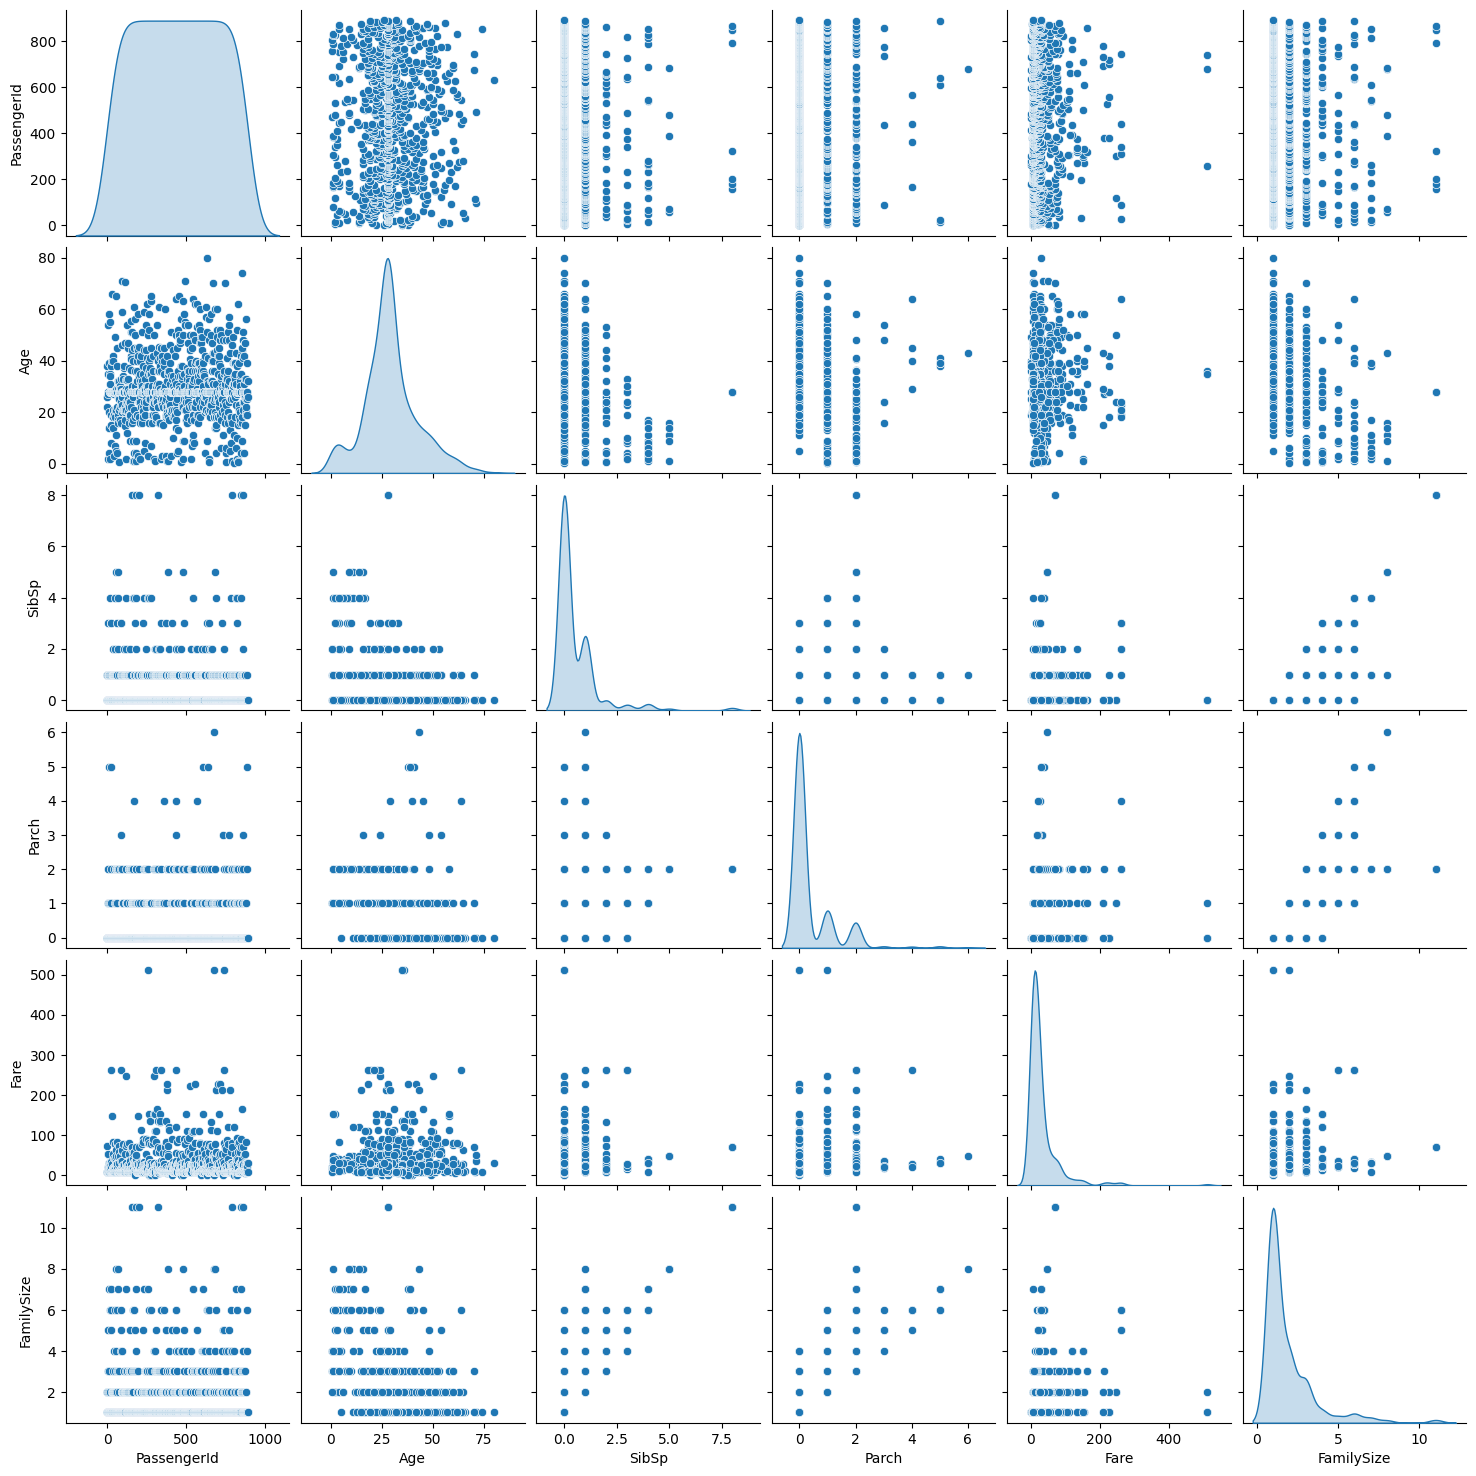

In [19]:
#Pairplot for numerical variables
sns.pairplot(numeric_df, diag_kind='kde')
plt.show()